# Which Star Wars movie is best?

This project will answer the question "does America realize that 'The Empire Strikes Back' is clearly the best movie of the Star Wars franchize?" The data used is a survey conducted by FiveThirtyEight which received 835 responses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

## Data Preparation

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

First let's remove rows were RespondentID is NaN because this is supposed to be the unique identifier for each respondent. 

In [5]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

Currently we have string data representing Yes/No answers to some of the questions. We will change the Yes/No answers to booleans and leave the NaN values. We'll start with two columns: "Have you seen any of the 6 films in the Star Wars franchise?" and " Do you consider yourself to be a fan of the Star Wars film franchise?"

In [6]:
# Create a mapping.
yes_no = {'Yes': True, 'No': False}
# Apply the mapping to the columns.
star_wars[star_wars.columns[1]].map(yes_no)
star_wars[star_wars.columns[2]].map(yes_no)

star_wars[star_wars.columns[1:3]].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,Yes,Yes
2,No,NaN
3,Yes,No
4,Yes,Yes
5,Yes,Yes


Next we will convert the columns containing responses about whether people had seen a particular movie. The values are either the name of the movie, meaning they saw it, or NaN. We'll convert them to True and False respectively.

In [7]:
import numpy as np
# Create mapping to convert values to True or False
movie_map = {}
for i in range(3,9):
    name = star_wars.iloc[:,i].unique()[0]
    movie_map[name] = True
    movie_map[np.NaN] = False

In [8]:
# Apply mapping
for i in range(3,9):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(movie_map)

In [9]:
# Rename set of columns to more intuitive names
# First create mapping for names
col_names = {}
i = 1
for item in star_wars.columns[3:9]:
    col_names[item] = "seen_{}".format(i)
    i += 1
    
star_wars.rename(columns=col_names, inplace=True)

The next set of columns contain the ratings people gave to each movie. We will convert these to floats to analyze later.

In [10]:
# Cast columns to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# Rename columns
rank_cols = {}
i = 1
for item in star_wars[star_wars.columns[9:15]]:
    rank_cols[item] = "ranking_{}".format(i)
    i += 1
star_wars.rename(columns=rank_cols, inplace=True)

In [11]:
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Analysis

Now we can start analyzing the results. We'll start with visualizing the rankings to see which movie was ranked highest. We will adjust the score so that higher is better.

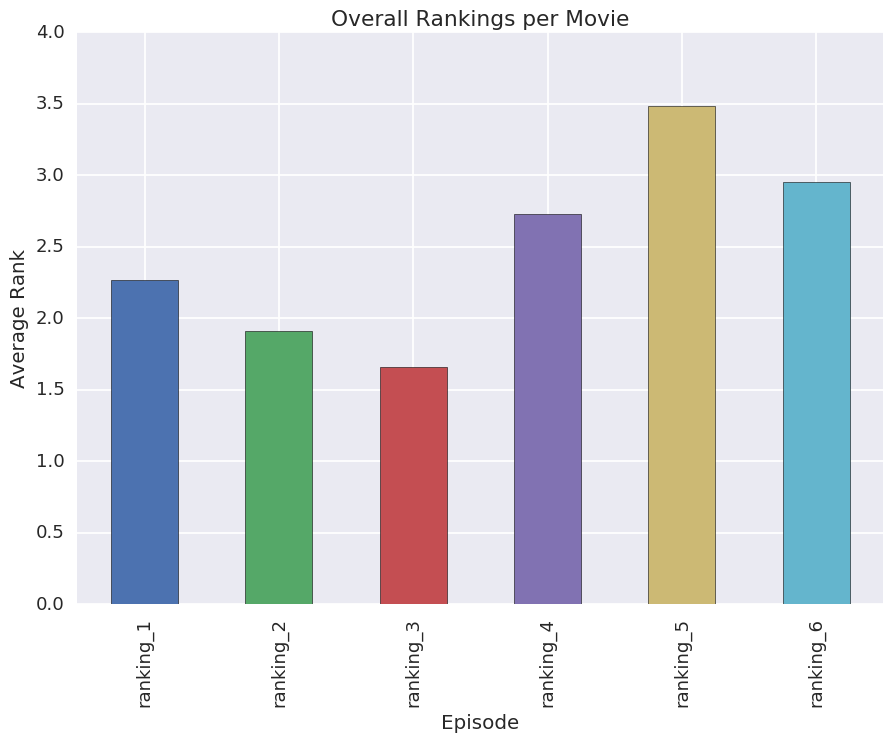

In [136]:
# Change the format so that highest bar is best instead of lowest 
# by subtracting means from 6 (the highest possible score)
rank_mean = star_wars[star_wars.columns[9:15]].mean()
inverted = 6 - rank_mean
# Plot mean of rankings by movie
plt.style.use('seaborn-deep')
ax1 = inverted.plot(kind='bar')
ax1.set_ylim(0, 4)
ax1.set_ylabel('Average Rank')
ax1.set_xlabel('Episode')
ax1.set_title('Overall Rankings per Movie')

It appears the original 3 movies (episodes 4, 5, and 6) are more popular and, indeed, The Empire Strikes Back is the most popular of all.

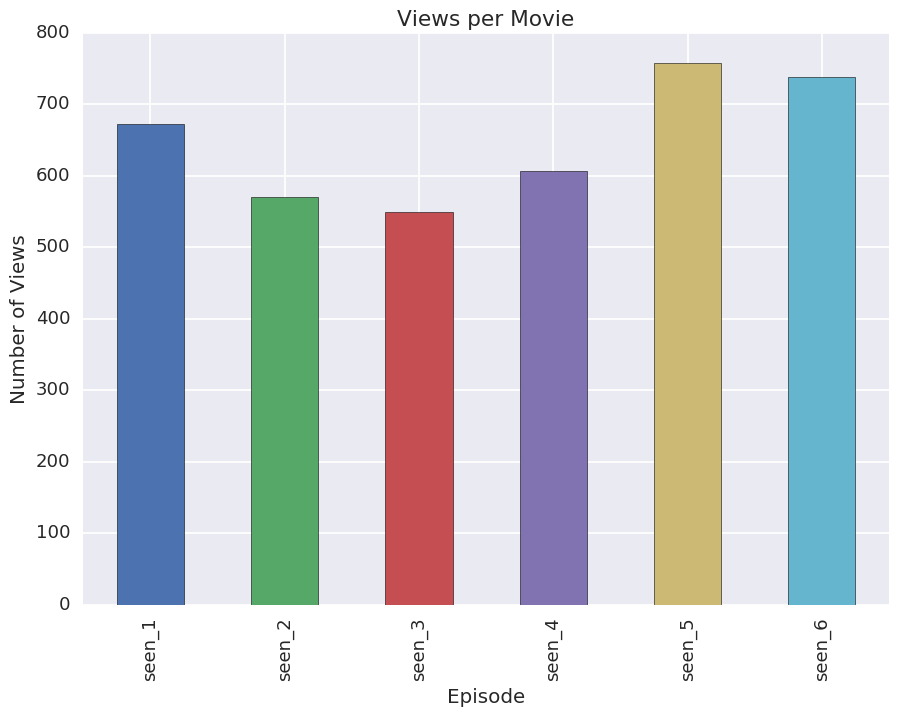

In [75]:
# Plot how many respondents saw each movie
ax2 = star_wars[star_wars.columns[3:9]].sum().plot.bar()
ax2.set_ylabel('Number of Views')
ax2.set_xlabel('Episode')
ax2.set_title('Views per Movie')

It also appears that 5th movie was the most viewed of them all which may have helped it achieve a higher ranking overall. Let's look at this data again first by gender, then by those who consider themselves Star Wars fans, and those who consider themselves Star Trek fans.

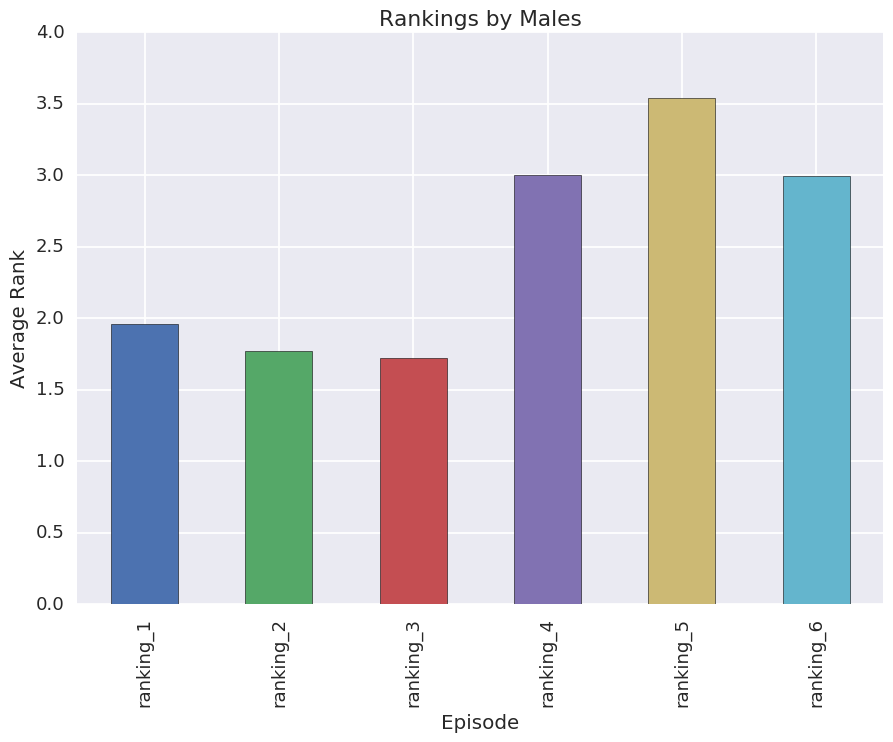

In [139]:
# Filter dataframe into two groups, male and female.
males = star_wars[star_wars["Gender"] == "Male"]
males = 6 - males[males.columns[9:15]].mean()
females = star_wars[star_wars["Gender"] == "Female"]
females = 6 - females[females.columns[9:15]].mean()
# Plot movie rankings among males
ax3 = males.plot.bar()
ax3.set_ylabel('Average Rank')
ax3.set_xlabel('Episode')
ax3.set_title('Rankings by Males')

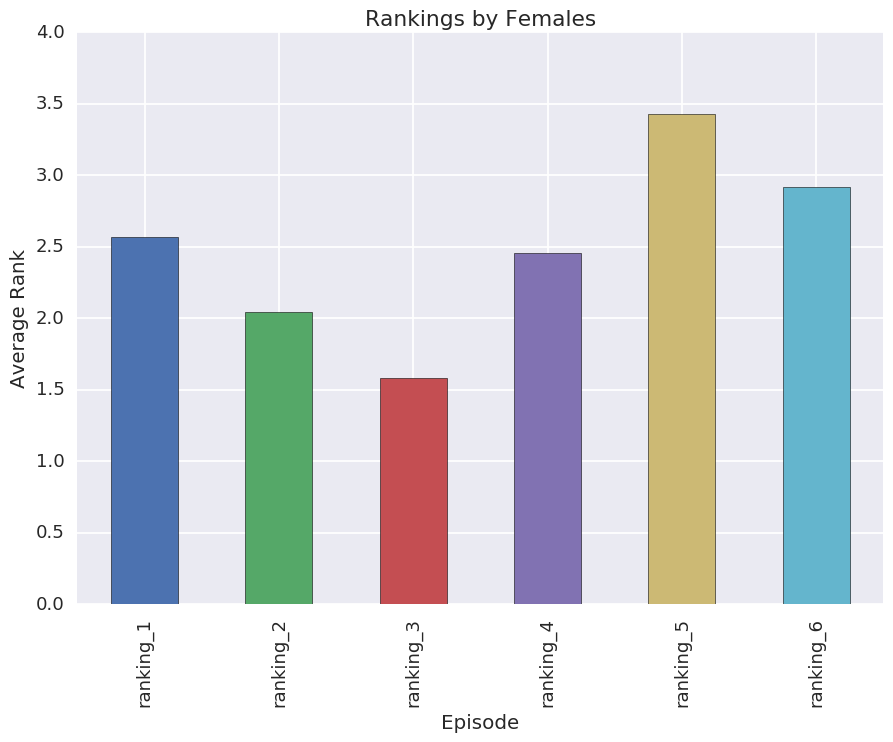

In [141]:
# Plot movie rankings among females
ax4 = females.plot.bar()
ax4.set_ylabel('Average Rank')
ax4.set_ylim(0, 4)
ax4.set_xlabel('Episode')
ax4.set_title('Rankings by Females')

It seems the preferences stay roughly the same across genders but the differences between movie rankings are more pronounced among females.

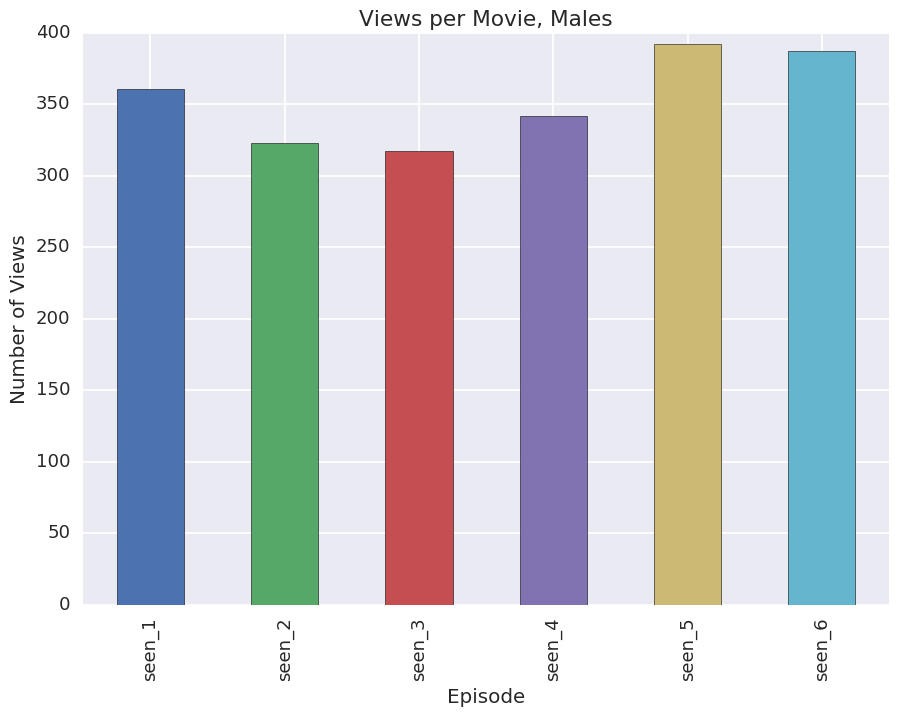

In [93]:
# Plot movies viewed among males
ax5 = males[males.columns[3:9]].sum().plot.bar()
ax5.set_ylabel('Number of Views')
ax5.set_xlabel('Episode')
ax5.set_title('Views per Movie, Males')

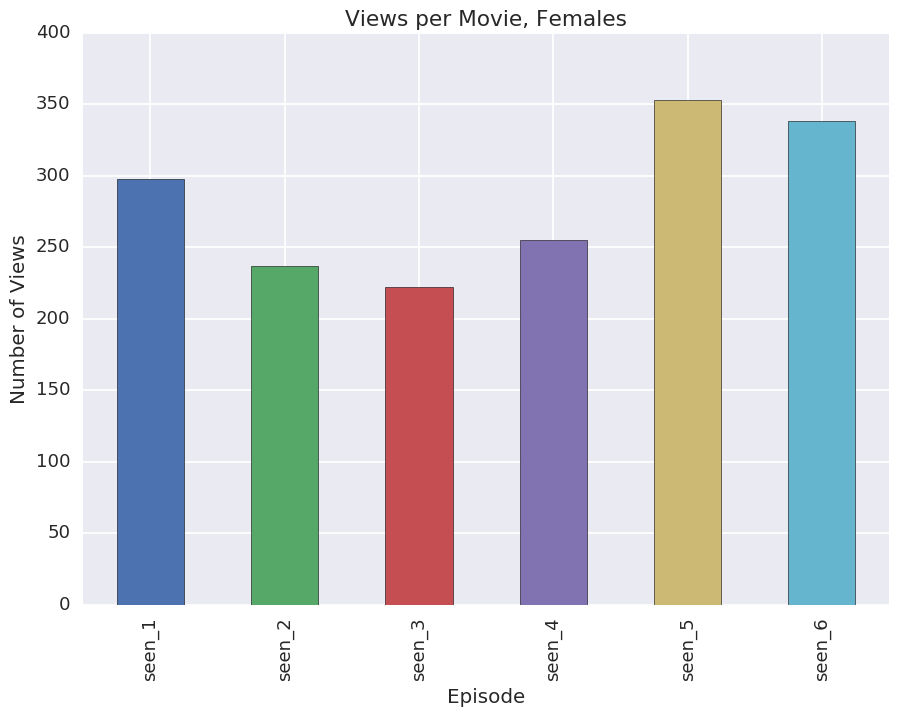

In [94]:
# Plot movies viewed among females
ax6 = females[females.columns[3:9]].sum().plot.bar()
ax6.set_ylabel('Number of Views')
ax6.set_xlabel('Episode')
ax6.set_title('Views per Movie, Females')

For both genders, episodes 1, 5, and 6 are the most seen with a smaller proportion of females having seen the other episodes.

In [117]:
star_wars[star_wars.columns[15:29]]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably
7,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably
8,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably
9,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very unfavorably,Somewhat unfavorably,Somewhat favorably
10,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably


In [164]:
char_map = {}
char_list = ["Luke Skywalker", "Han Solo", "Princess Leia", "Obi Wan Kenobi", "Yoda", "R2-D2", 
        "C-3P0", "Anakin Skywalker", "Dearth Vader", "Lando Calrissian", 
        "Padme Amidala", "Boba Fett", "Emperor Palpatine", "Jar Jar Binks"]
i = 0
for col in star_wars.columns[15:29]: 
    char_map[col] = char_list[i]
    i += 1
    
star_wars.rename(columns=char_map, inplace=True)

In [167]:
star_wars["Luke Skywalker"].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Luke Skywalker, dtype: int64